In [2]:
!git clone https://github.com/imostafizur/CSE498R.git

fatal: destination path 'CSE498R' already exists and is not an empty directory.


## Malaria Detection using InceptionResNetV2

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import backend as K
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
image = ('cell_images')

In [5]:
# Count number of images in each folder
print('Number of images in each folder:')
for folder in os.listdir(image):
    print('{}: {}'.format(folder, len(os.listdir(os.path.join(image, folder)))))

Number of images in each folder:
Uninfected: 13780
Parasitized: 13780


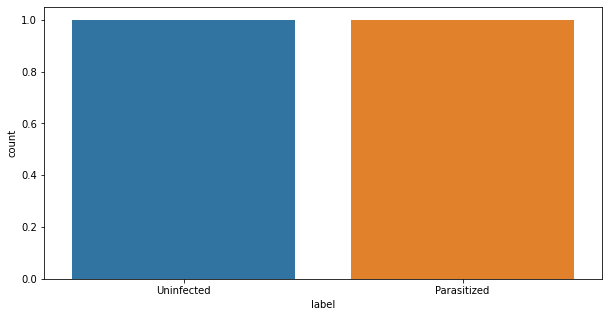

In [6]:
# Plot number of images in each folder
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=pd.DataFrame({'label': os.listdir(image)}))

In [7]:
# Create train and test data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=20,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        horizontal_flip=True,
                                        fill_mode='nearest')

In [8]:
# Create train and test data generators
test_datagen = ImageDataGenerator(rescale=1./255)


In [9]:
# Create train and test data generators
train_generator = train_datagen.flow_from_directory(image,
                                                    target_size=(224, 224), 
                                                    batch_size=32,
                                                    class_mode='binary')
                                                    

Found 27558 images belonging to 2 classes.


In [10]:
# Create train and test data generators
test_generator = test_datagen.flow_from_directory(image,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 27558 images belonging to 2 classes.


In [11]:
# Create the base pre-trained model
base_model = InceptionResNetV2(weights='imagenet', include_top=False)

219070464/219055592 [==============================] - 6s 0us/step


In [12]:
# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# Add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# Add a logistic layer
predictions = Dense(1, activation='sigmoid')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# First: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionResNetV2 layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [13]:
# Model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                           

In [14]:
# Train the model on new data for a few epochs
history = model.fit_generator(train_generator,
                                epochs=10,
                                validation_data=test_generator,
                                validation_steps=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
862/862 [==============================] - 373s 406ms/step - loss: 0.3155 - accuracy: 0.8730 - val_loss: 0.2732 - val_accuracy: 0.9062
Epoch 2/10
862/862 [==============================] - 346s 401ms/step - loss: 0.2637 - accuracy: 0.8953 - val_loss: 0.1693 - val_accuracy: 0.9375
Epoch 3/10
862/862 [==============================] - 344s 399ms/step - loss: 0.2482 - accuracy: 0.9030 - val_loss: 0.0841 - val_accuracy: 0.9688
Epoch 4/10
862/862 [==============================] - 343s 398ms/step - loss: 0.2430 - accuracy: 0.9057 - val_loss: 0.2092 - val_accuracy: 0.9375
Epoch 5/10
862/862 [==============================] - 342s 397ms/step - loss: 0.2365 - accuracy: 0.9090 - val_loss: 0.2068 - val_accuracy: 0.9062
Epoch 6/10
862/862 [==============================] - 339s 393ms/step - loss: 0.2324 - accuracy: 0.9126 - val_loss: 0.0686 - val_accuracy: 0.9688
Epoch 7/10
862/862 [==============================] - 338s 392ms/step - loss: 0.2309 - accuracy: 0.9135 - val_loss: 0.1718 -

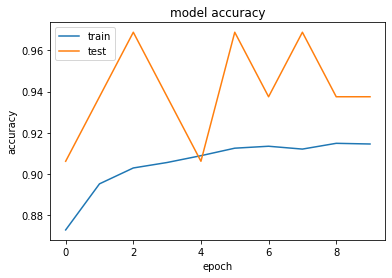

In [15]:
#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
# Save the model
model.save('Malaria_inceptionresnet50.h5')